In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("clean6_car_price.csv")
data.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,0,1,1,2017.0,1956.0,5.0,-0.083515
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,1,0,1,2021.0,1330.0,5.0,0.058409
2,2,Toyota Camry 2.5 G,16.40,60343.0,1,0,1,2016.0,2494.0,5.0,0.239361
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,1,1,1,2016.0,1199.0,5.0,-0.330867
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,1,0,1,2017.0,1197.0,5.0,-0.203643


In [4]:
# Using K-Means Clustering
x = data.iloc[:,2:10] # 1st for rows and second for columns
x

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,10.03,86226.0,0,1,1,2017.0,1956.0,5.0
1,12.83,13248.0,1,0,1,2021.0,1330.0,5.0
2,16.40,60343.0,1,0,1,2016.0,2494.0,5.0
3,5.15,69414.0,1,1,1,2016.0,1199.0,5.0
4,7.66,49719.0,1,0,1,2017.0,1197.0,5.0
...,...,...,...,...,...,...,...,...
4807,13.90,79000.0,0,0,1,2013.0,2979.0,7.0
4808,7.50,45000.0,1,1,1,2019.0,2179.0,5.0
4809,10.90,98000.0,0,0,1,2011.0,1995.0,7.0
4810,7.95,60000.0,0,1,1,2017.0,2143.0,4.0


In [5]:
kmeans = KMeans(3) # Creating three clusters
kmeans.fit(x)

KMeans(n_clusters=3)

In [6]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 1, 2, ..., 2, 2, 2])

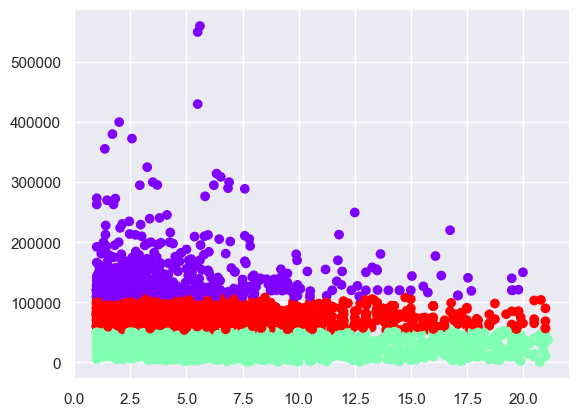

In [7]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['car_prices_in_rupee'],
            data_with_clusters['kms_driven'],
            c=data_with_clusters['Clusters'],
            cmap='rainbow')